**Proyecto Final Métodos Numéricos**


**Ecuación diferencial de un imán permanente de momento dipolar m colocado en un campo magnético B**

Si queremos modelar el movimiento de un iman permanente de momento dipolar m colocado en un campo magnetico, nosotros podemos ayudarnos de su hamiltoniano, donde encontrariamos el ángulo con el que se mueve dependiente del tiempo. Cuya ecuación correspondiente es la que sigue 

$I\ddot{\theta}+b\dot{\theta}+m(B_{ac} sen(\omega t)) sen (\theta)=0$

Nuestras variables $I$ tiene que ver con el momento angular de el imán, $b$ es el parámetro de amortiguación, $\omega$ es la amplitud de frecuencia y $B_{ac}$ es la componente del campo dependiente del tiempo. Para reducir la cantidad de constantes de nuestro sistema, normalizaremos la ecuación diferencia con ayuda de:

$ \omega t=2 \pi t$ ,  $\theta=2\pi x $  ,  $\omega_0=\sqrt{\cfrac{mB_{dc}}{I}} $ ,    $\Omega=\cfrac{\omega_0}{\omega} $  ,   
$\gamma=\cfrac{b}{I\omega}$ ,   $A=\cfrac{mB_{ac}}{I\omega^2}$

de manera que nuestra ecuación diferencial, queda:

$ \ddot{x}+2\pi\gamma\dot{x}+2\pi A sen(2\pi t)sen(2\pi x)=0$

Donde $A$ es la amplitud de conducción normalizada, y $\gamma$ es el parámetro de amortiguación normalizado.
Como podemos ver la ecuación que nos queda es una ecuación diferencial de segundo orden con dos variables $x$ y $t$, si la desacoplamos para hacer un sistema de ecuaciones diferenciales, lo podriamos reescribir como:

$\dot{t}=1$

$\dot{x}=y$

$\dot{y}=-2\pi \gamma y-2\pi A sen(2\pi t)sen(2 \pi x)$

Que a su vez por la complejidad de las mismas, podemos apoyarnos de métodos numéricos para solucionar este sistema, para esto nos ayudaremos del método Runge-Kutta a cuarto orden para poder resolver simultaneamente las ecuaciones diferenciales de manera numérica.


**Solución a una ecuación diferencial de segundo orden con el método de Runge-Kutta a cuarto orden**

El método de Runge-Kutta a 4° orden es un método numérico utilizado en cálculo de ecuaciones diferenciales.
Este es un método iterativo, por lo que es óptimo programarlo para su aplicación. Las variables que necesitamos conocer para aplicar este método son: Valores iniciales para la variable dependiente e independiente del sistema y el valor del tamaño del paso para hacer las evaluaciones
Partimos del hecho de conocer la función $f(x,y,t)$ que es el valor de la derivada de la ecuación diferencial.

Las fórmulas que nos ayudan a utilizar este método son las siguientes:

$k_1=f(x_n,y_n,t_n)$

$k_2=f(x_n+\cfrac{h}{2},y_n+\cfrac{h}{2}k_1,x_n+\cfrac{h}{2},t_n+\cfrac{h}{2})$

$k_3=f(x_n+\cfrac{h}{2},y_n+\cfrac{h}{2}k_2,t_n+\cfrac{h}{2})$

$k_4=f(x_n+h,y_n+hk_3,t_n+h)$

$y_{n+1}=y_n+\cfrac{h}{6}(k_1+2k_2+2k_3+k_4)$


Inicialmente se programó la función de Runge Kutta a 4 orden como un proceso iterativo, y se graficará el resultado para poder visualizar el resultado a la ecuación diferencial.
Como tenemos un sistema acoplado de ecuaciones a cada ecuación la resolveremos con ayuda del metodo pero de manera simultanea para que se cumpla el acoplamiento de las tres ecuaciones diferenciales que tenemos.

In [397]:
import numpy as np
from matplotlib import pyplot
import math 

def funcion(x,y,t,g,a):
    f=(-2*np.pi*g*y)-(2*np.pi*(a*np.sin(2*np.pi*t))*np.sin(2*np.pi*x))
    return f

def funcion2(x,y,t):
    f1=y
    return f1


def funcion3(x,y,t):
    f2=1
    return f2

def Runge4(x0,y0,t0,n,tf,g,a):
    xi=x0
    yi=y0
    ti=t0
    p1=(tf-ti)/n
    p=round(p1)
    
    y=np.zeros(p)
    x=np.zeros(p)
    t=np.zeros(p)
    
    for i in range (p):
        k11=funcion(xi,yi,ti,g,a)
        k12=funcion2(xi,yi,ti)
        k13=funcion3(xi,yi,ti)
        #primer bloque de constantes
        
        k21=funcion(xi+(n/2),yi+(n*k11)/2,ti+(n/2),g,a)
        k22=funcion2(xi+(n/2),yi+(n*k12)/2,ti+(n/2))
        k23=funcion3(xi+(n/2),yi+(n*k13)/2,ti+(n/2))

        #segundo bloque 
        
        k31=funcion(xi+(n/2),yi+(n*k21)/2,ti+(n/2),g,a)
        k32=funcion2(xi+(n/2),yi+(n*k22)/2,ti+(n/2))
        k33=funcion3(xi+(n/2),yi+(n*k23)/2,ti+(n/2))

        #Tercer bloque
        
        k41=funcion(xi+n,yi+(n*k31),ti+n,g,a)
        k42=funcion2(xi+n,yi+(n*k32),ti+n)
        k43=funcion3(xi+n,yi+(n*k33),ti+n)
        #Cuarto bloque
        
        y11=yi+n*(k11+2*k21+2*k31+k41)/6
        y12=xi+n*(k12+2*k22+2*k32+k42)/6
        y13=ti+n*(k13+2*k23+2*k33+k43)/6
        
        #funciones n+1
        
        yi=y11
        xi=y12
        ti=y13
        
        #
        y[i]=y11
        x[i]=y12
        t[i]=y13
    return y





def Runge4x(x0,y0,t0,n,tf,g,a):
    xi=x0
    yi=y0
    ti=t0
    p1=(tf-ti)/n
    p=round(p1)
    
    y=np.zeros(p)
    x=np.zeros(p)
    t=np.zeros(p)
    
    for i in range (p):
        k11=funcion(xi,yi,ti,g,a)
        k12=funcion2(xi,yi,ti)
        k13=funcion3(xi,yi,ti)
        #primer bloque de constantes
        
        k21=funcion(xi+(n/2),yi+(n*k11)/2,ti+(n/2),g,a)
        k22=funcion2(xi+(n/2),yi+(n*k12)/2,ti+(n/2))
        k23=funcion3(xi+(n/2),yi+(n*k13)/2,ti+(n/2))

        #segundo bloque 
        
        k31=funcion(xi+(n/2),yi+(n*k21)/2,ti+(n/2),g,a)
        k32=funcion2(xi+(n/2),yi+(n*k22)/2,ti+(n/2))
        k33=funcion3(xi+(n/2),yi+(n*k23)/2,ti+(n/2))

        #Tercer bloque
        
        k41=funcion(xi+n,yi+(n*k31),ti+n,g,a)
        k42=funcion2(xi+n,yi+(n*k32),ti+n)
        k43=funcion3(xi+n,yi+(n*k33),ti+n)
        #Cuarto bloque
        
        y11=yi+n*(k11+2*k21+2*k31+k41)/6
        y12=xi+n*(k12+2*k22+2*k32+k42)/6
        y13=ti+n*(k13+2*k23+2*k33+k43)/6
        
        #funciones n+1
        
        yi=y11
        xi=y12
        ti=y13
        
        #
        y[i]=y11
        x[i]=y12
        t[i]=y13

        
    return x
        

In [419]:
def Graf(x0,y0,t0,p,tf,g,a):
    pyplot.xlabel('$x$', fontsize=18)
    pyplot.ylabel('$\dot{x}$', fontsize=18)
    
    pyplot.plot(Runge4x(x0,y0,t0,p,tf,g,a),Runge4(x0,y0,t0,p,tf,g,a))
    pyplot.show()
    

Como podemos notar para resolver el sistema necesitamos de condiciones iniciales.
Para apoyarnos de un sistema conocido, podemos observar que nuestras ecuaciones son las ecuaciones de movimiento del péndulo gravitacional forzado paramétricamente con un soporte que oscila verticalmente. de manera que los podemos trabajar de manera similar.
Es interesante analizar el comportamiento ya que medida que aumenta la amplitud de conducción normalizada A, se han encontrado numéricamente transiciones de atractores periódicos a atractores caóticos, y viceversa, coexistencia de diferentes atractores, caos transitorio, múltiples transiciones de duplicación de períodos al caos, etc.

**Resultados**

**Caso 1**
El primer caso es considerando las condiciones:

$t=0 \hspace{2cm} x_{0}=1/2 \hspace{2cm} y_0=0 \hspace{2cm} \gamma=0.35 \hspace{2cm} A=0.75 $ 

es decir, si pusieramos el pendulo inicialmente en un angulo de $\pi$ con respecto del origen considerando los parámetros de acoplamiento y amplitud del campo ya escritos.



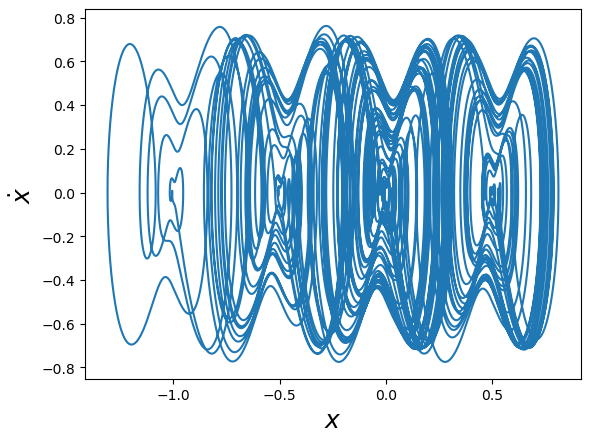

In [420]:
Graf(0.5,0,0,0.001,200,0.35,0.75)


Si consideramos ahora el caso de inicial en un angulo 0 con respecto del origen y los mismos parámetros.

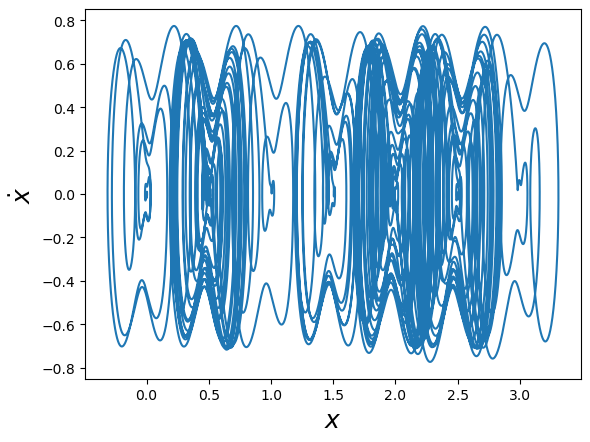

In [421]:
Graf(0,0,0,0.001,200,0.35,0.75)

Si consideramos ahora el caso de inicial en un angulo $\pi/2$ con respecto del origen y los mismos parámetros.

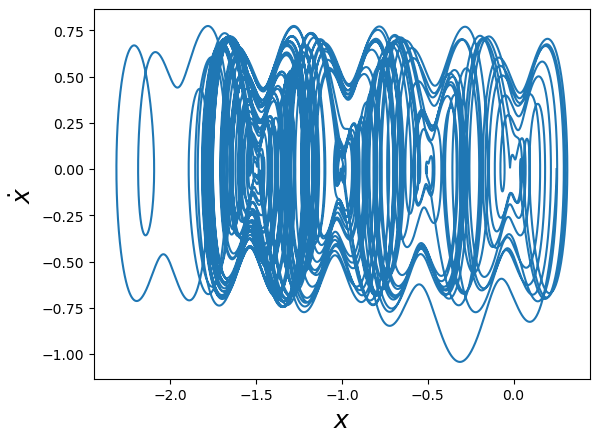

In [429]:
Graf(0.25,0,0,0.001,200,0.35,0.75)

**Caso 2**

Si ahora hacemos el mismo análisis de los ángulos pero incrementamos la amplitud del campo
como $A=0.85$

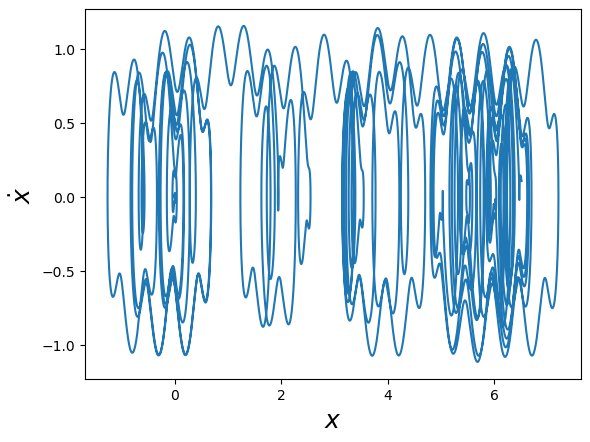

In [423]:
Graf(0,0,0,0.001,100,0.35,0.89)

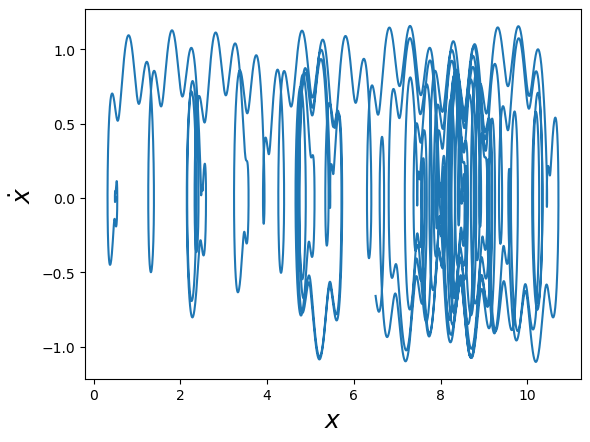

In [424]:
Graf(0.5,0,0,0.001,100,0.35,0.89)

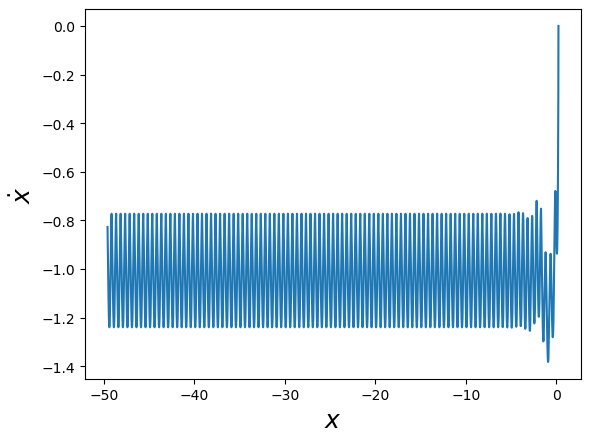

In [425]:
Graf(0.25,0,0,0.001,50,0.35,0.89)

**Caso 3** 
Ahora si aumentamos el parámetro de amortiguación a $\gamma=0.45$



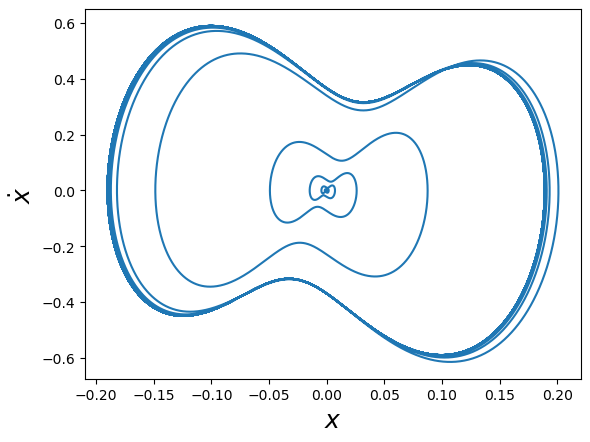

In [426]:
Graf(0,0,0,0.001,50,0.45,0.75)

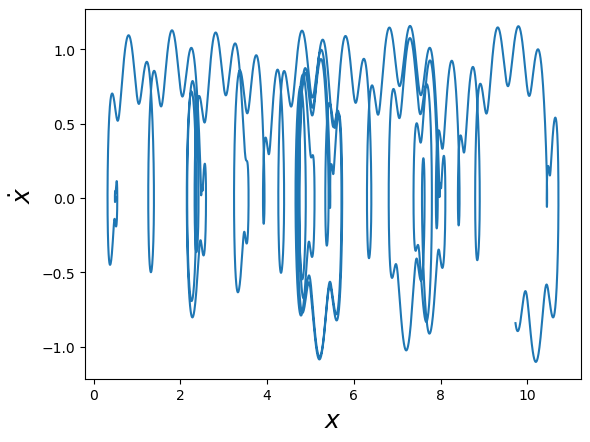

In [427]:
Graf(0.5,0,0,0.001,50,0.35,0.89)

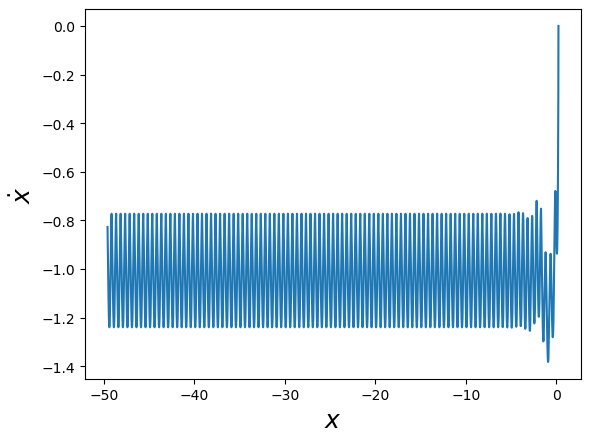

In [428]:
Graf(0.25,0,0,0.001,50,0.35,0.89)

In [390]:
def prom(x0,y0,t0,n,tf):
    y=Runge4(x0,y0,t0,n,tf)
    m=len(y)
    lk=0
    for i in range(m):
            lk+=y[i]
    prom=lk/(tf-t0)
    return prom
    
prom(0.5,0,0,0.001,10)


0.8593204492769256